# EDA

In [1]:
import requests
from xml.etree import ElementTree as ET

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import anderson
import statsmodels.api as sm
from datetime import datetime
from datetime import timedelta
import os

plt.rc('font', family='Malgun Gothic')

## Data

In [2]:
raw_data = pd.read_csv('OBS_ASOS_DD_20240509203418.csv', encoding = 'euc-kr')
raw_data

C:\Users\USER\AppData\Local\Temp\ipykernel_22628\1255440405.py:1: DtypeWarning: Columns (60) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('OBS_ASOS_DD_20240509203418.csv', encoding = 'euc-kr')


,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),...,0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,안개 계속시간(hr)
0,90,속초,2023-01-01,3.2,0.3,2315.0,7.3,1346.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90,속초,2023-01-02,-0.5,-5.1,348.0,4.2,1537.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90,속초,2023-01-03,0.0,-5.1,754.0,5.6,1221.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90,속초,2023-01-04,0.7,-2.7,715.0,5.0,1300.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90,속초,2023-01-05,2.5,-1.6,2.0,7.0,1424.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47778,296,북부산,2024-05-04,18.2,7.3,458.0,26.1,1445.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.2,7.4,NaN,NaN,NaN
47779,296,북부산,2024-05-05,18.7,17.6,1713.0,20.6,849.0,NaN,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47780,296,북부산,2024-05-06,19.6,17.1,2356.0,24.1,1334.0,NaN,6.5,...,NaN,NaN,NaN,NaN,NaN,4.0,5.7,NaN,NaN,NaN
47781,296,북부산,2024-05-07,15.7,12.5,2323.0,21.0,1228.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,2.3,3.2,NaN,NaN,NaN


## columns 확인

In [4]:
raw_data.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)',
       '평균 이슬점온도(°C)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)',
       '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)',
       '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조시간(hr)', '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)', '일 최심적설(cm)', '일 최심적설 시각(hhmi)',
       '합계 3시간 신적설(cm)', '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0m 지중온도(°C)', '1.5m 지중온도(°C)', '3.0m 지중온

In [59]:
raw_data = raw_data[['지점', '지점명', '일시', '평균기온(°C)','최고기온(°C)','일강수량(mm)','평균 풍속(m/s)','안개 계속시간(hr)']]
data = raw_data.copy()
data['일시'] = pd.to_datetime(data['일시'])

In [60]:
start_date = '2023-01-01'
end_date = '2024-01-01'

eda_data = data[(data['일시'] >= start_date) & (data['일시'] < end_date)]

data_seoul = eda_data[data['지점명'] == '서울']

C:\Users\USER\AppData\Local\Temp\ipykernel_14132\2477304362.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_seoul = eda_data[data['지점명'] == '서울']


In [62]:
data_seoul.head()

,지점,지점명,일시,평균기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),안개 계속시간(hr)
5434,108,서울,2023-01-01,-0.2,3.8,NaN,2.7,NaN
5435,108,서울,2023-01-02,-4.5,-0.4,NaN,2.5,NaN
5436,108,서울,2023-01-03,-5.0,0.6,NaN,1.8,NaN
5437,108,서울,2023-01-04,-1.8,3.3,NaN,1.9,NaN
5438,108,서울,2023-01-05,-1.6,3.6,NaN,1.6,NaN


In [63]:
data_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 5434 to 5798
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   지점           365 non-null    int64         
 1   지점명          365 non-null    object        
 2   일시           365 non-null    datetime64[ns]
 3   평균기온(°C)     365 non-null    float64       
 4   최고기온(°C)     365 non-null    float64       
 5   일강수량(mm)     150 non-null    float64       
 6   평균 풍속(m/s)   363 non-null    float64       
 7   안개 계속시간(hr)  8 non-null      float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 25.7+ KB


In [66]:
data_seoul.drop(['일시'], axis = 1).describe()

,지점,평균기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),안개 계속시간(hr)
count,365.0,365.000000,365.000000,150.000000,363.000000,8.000000
mean,108.0,14.109041,18.800000,10.658667,2.270799,2.756250
std,0.0,10.572377,10.449026,18.644880,0.616599,2.251913
min,108.0,-14.700000,-8.000000,0.000000,1.100000,0.500000
25%,108.0,5.000000,9.300000,0.000000,1.800000,1.232500
50%,108.0,15.800000,21.200000,1.500000,2.200000,2.060000
75%,108.0,23.300000,27.300000,10.400000,2.500000,3.402500
max,108.0,30.900000,35.800000,91.600000,5.400000,6.350000


## 결측치 확인

In [70]:
def null_check(df):
    
    print('[ 결측치 확인 ]')
    print("(전체 row 수 : ", len(df), ")")
    print('')
    print('-' * 35)

    for column in df.columns:
        
        if df[column].isna().sum() == 0:
            pass

        else:
            print()
            print(column + " 결측치 비율:", round(df[column].isna().sum() / len(df) * 100, 2), "%")
            print('-' * 35)

    msno.matrix(df = df, figsize = (5, 5), color = (0.8, 0.5, 0.2), fontsize = 7);

In [76]:
null_check(data_seoul)

[ 결측치 확인 ]
(전체 row 수 :  365 )

-----------------------------------

일강수량(mm) 결측치 비율: 58.9 %
-----------------------------------

평균 풍속(m/s) 결측치 비율: 0.55 %
-----------------------------------

안개 계속시간(hr) 결측치 비율: 97.81 %
-----------------------------------


## 분포 확인

In [75]:
def dist(df):

    dist_column_list = []

    for column in df.columns:
        if (df.dtypes[column] == 'int64') | (df.dtypes[column] == 'float'):
            dist_column_list.append(column)
        else:
            pass

    n_plot = len(dist_column_list)
    fig, axes = plt.subplots(n_plot, 1, figsize = (7, 20))
    for i, dist_column in enumerate(dist_column_list):
        axes[i].hist(df[dist_column].values, bins = 50, color = 'gray', edgecolor = 'gray')
        axes[i].set_title("[ " + dist_column + " ]" + " distribution")

    plt.tight_layout(h_pad = 3)
    plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14132\1467325078.py:17: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout(h_pad = 3)
c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


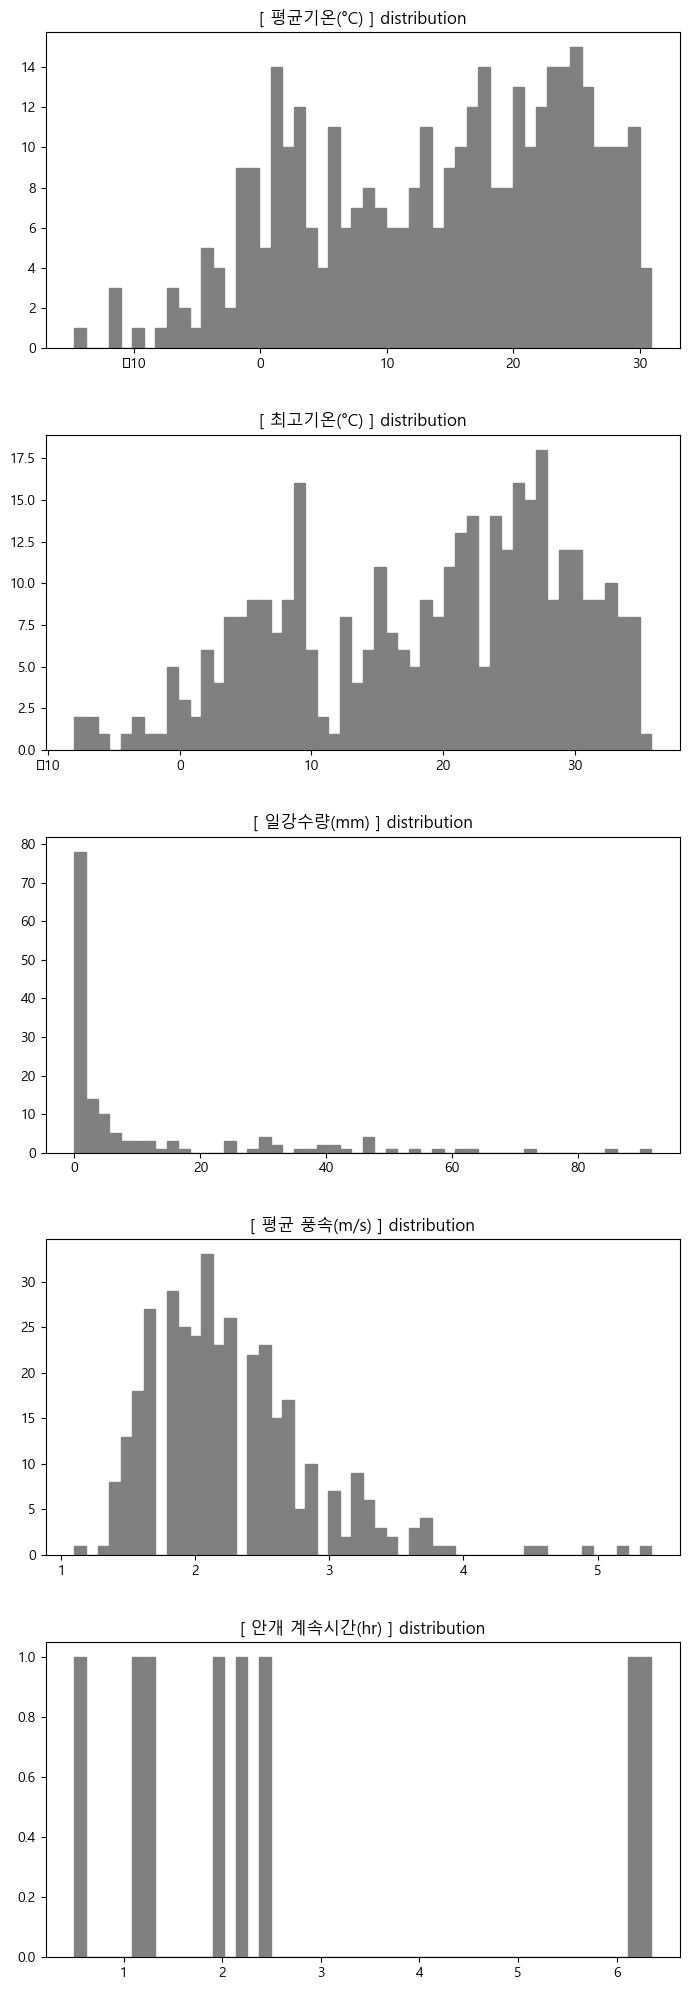

In [74]:
dist(data_seoul.drop(['지점'], axis = 1))

## 

C:\Users\USER\AppData\Local\Temp\ipykernel_14132\1467325078.py:17: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout(h_pad = 3)
c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


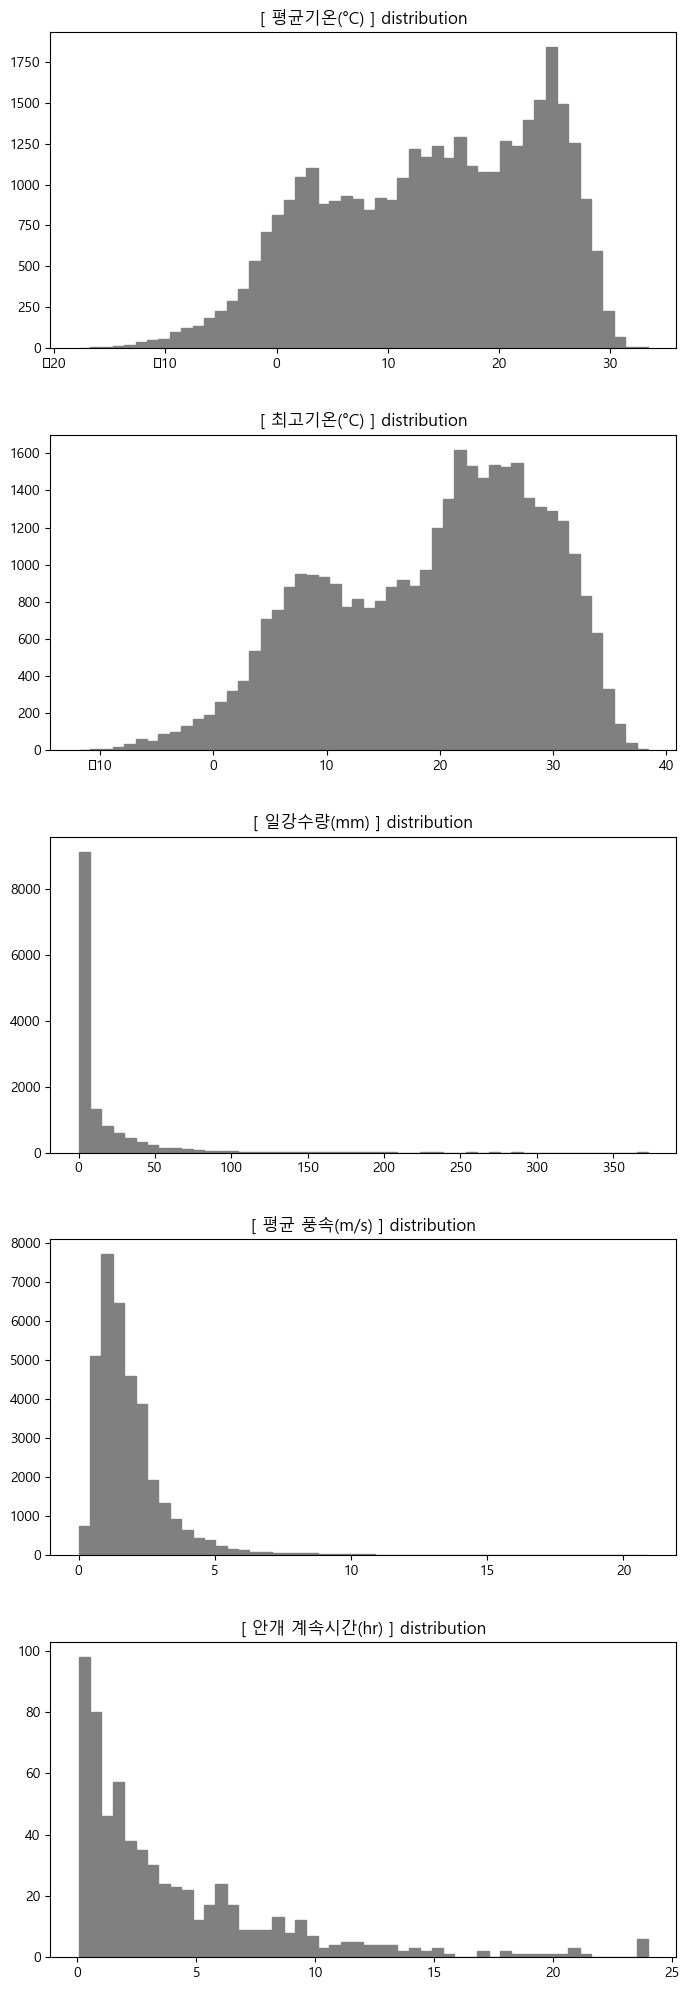

In [79]:
dist(eda_data.drop(['지점'], axis = 1))

## 시계열 plot

In [93]:
def line(df, time_column):

    dist_column_list = []

    df_eda = df.drop([time_column], axis = 1)
    x = np.linspace(0, len(df[time_column]), len(df[time_column]))

    for column in df_eda.columns:
        if (df_eda.dtypes[column] == 'int64') | (df_eda.dtypes[column] == 'float'):
            dist_column_list.append(column)
        else:
            pass

    n_plot = len(dist_column_list)
    fig, axes = plt.subplots(n_plot, 1, figsize = (7, 30))
    for i, dist_column in enumerate(dist_column_list):
        axes[i].plot(x, df_eda[dist_column].values, color = 'gray')
        axes[i].set_title("[ " + dist_column + " ]" + " plot")

    plt.tight_layout(h_pad = 3)
    plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14132\2680551083.py:20: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout(h_pad = 3)
c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


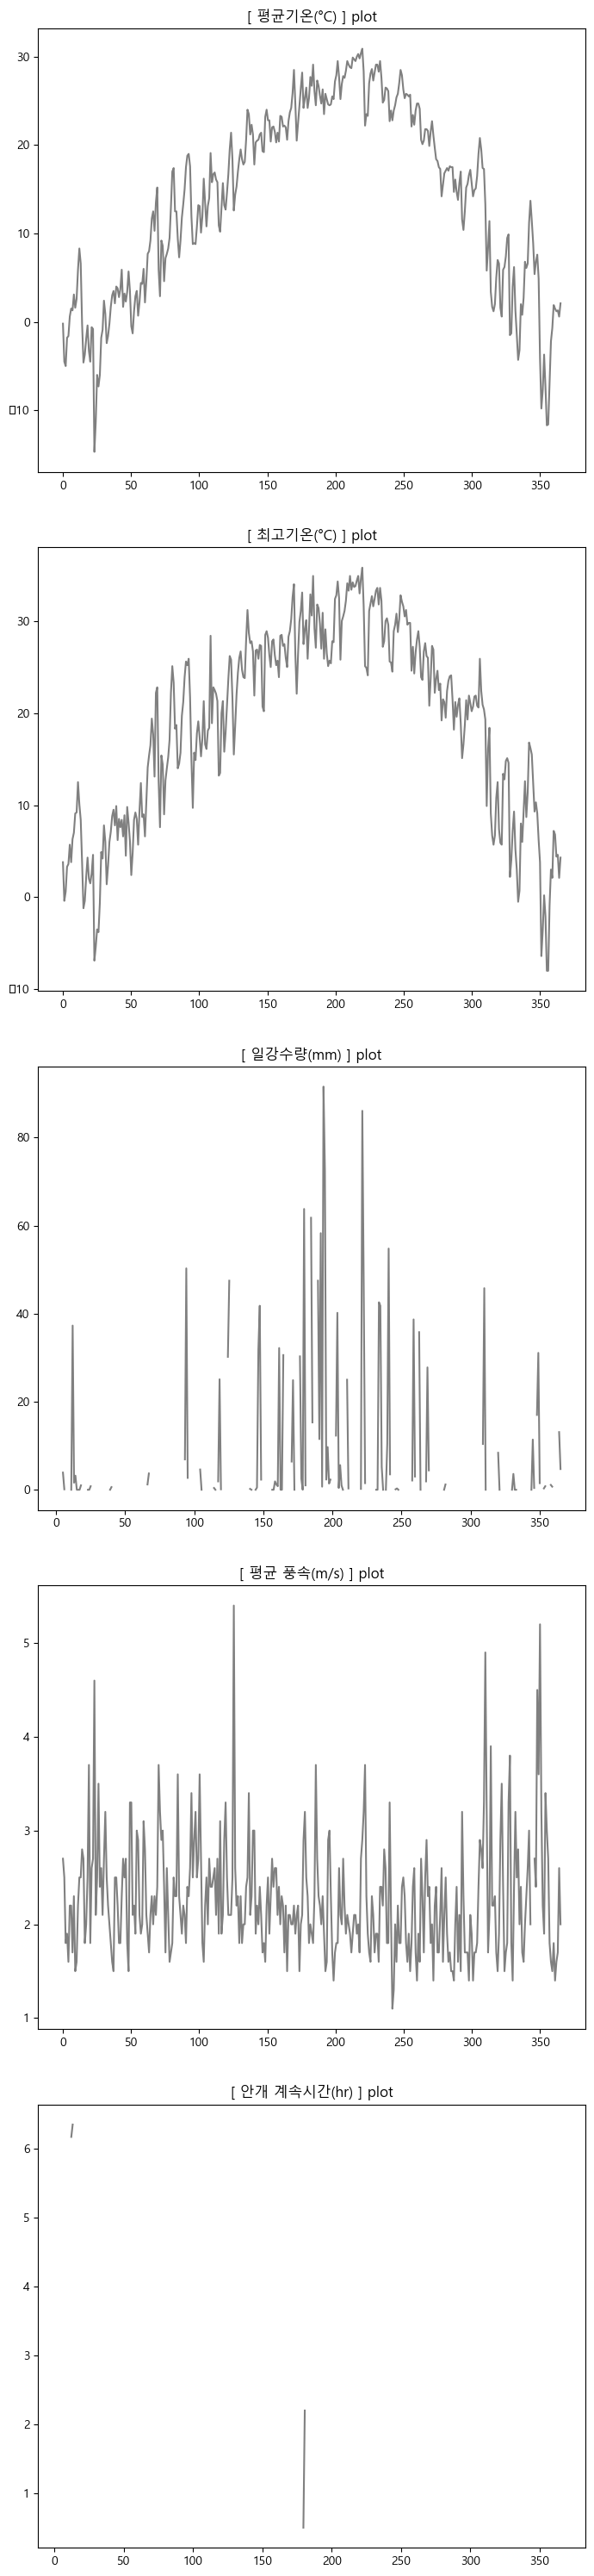

In [94]:
line(data_seoul.drop(['지점'], axis = 1), '일시')

## 정규성 검정

In [105]:
def norm_check(data, columns, test):

    if test == 'shapiro':
    
        print("[column별 샤피로 윌크 검정]")
        print("(H0 : 데이터가 정규분포를 따름)")
        print("")
        
        for column in columns:
    
            sha_stat, sha_pvalue = shapiro(data[column].dropna())    
            
            print('-'*40)
            print("")
            print(column + " 검정")
            print("샤피로-윌크 검정 통계량:", sha_stat)
            print("p-값:", sha_pvalue)
            print("")
        
    elif test == 'anderson':

        print("[column별 앤더슨 달링 검정]")
        print("(H0 : 데이터가 정규분포를 따름)")
        print("")
        
        for column in columns:
    
            and_result = anderson(data[column].dropna(), dist = 'norm')
            and_stat = and_result[0]
            and_cri_value = and_result[1][2]
            
            print('-'*40)
            print("")
            print(column + " 검정")
            print("앤더슨-달링 검정 통계량:", and_stat)
            print("5% 임계값:", and_cri_value)
            print("")     
 

In [106]:
norm_check(data_seoul, ['평균기온(°C)', '최고기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '안개 계속시간(hr)'], 'anderson')

[column별 앤더슨 달링 검정]
(H0 : 데이터가 정규분포를 따름)

----------------------------------------

평균기온(°C) 검정
앤더슨-달링 검정 통계량: 5.244507134268872
5% 임계값: 0.779

----------------------------------------

최고기온(°C) 검정
앤더슨-달링 검정 통계량: 5.958251176480189
5% 임계값: 0.779

----------------------------------------

일강수량(mm) 검정
앤더슨-달링 검정 통계량: 22.17758781460435
5% 임계값: 0.767

----------------------------------------

평균 풍속(m/s) 검정
앤더슨-달링 검정 통계량: 6.82839972185468
5% 임계값: 0.779

----------------------------------------

안개 계속시간(hr) 검정
앤더슨-달링 검정 통계량: 0.7434023269445635
5% 임계값: 0.709



## 이상치 확인

In [112]:
def outlier(data):
    
    plt.rc('font', family='Gothic')


    sns.set_theme(style="darkgrid")
    rcParams['figure.figsize'] = 12,8
    ax = sns.boxplot(data=data, palette="Pastel1")
    plt.title("Outliers for each column")
    plt.show();

c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\Lib

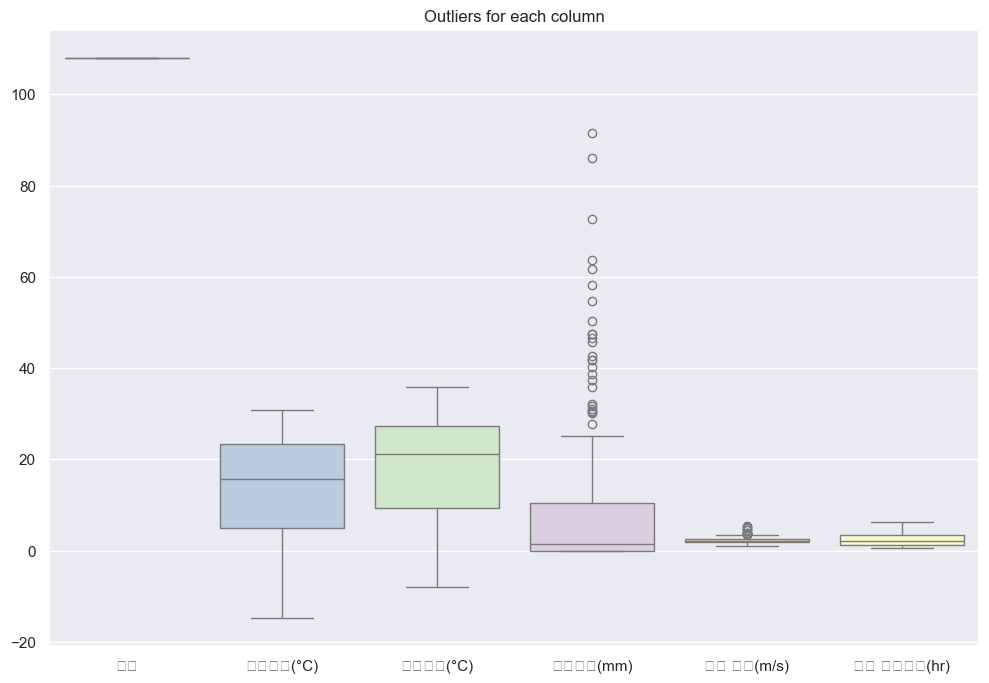

In [113]:
outlier(data_seoul)